In [133]:
%matplotlib inline

from ipywidgets import FloatProgress
from IPython.display import display
from ipywidgets import *

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

### Utilities

In [134]:
# Regression plot showing predicted gF scores vs original gF scores
def regression_plot(x,y,n,title):

    # fit a curve to the data using a least squares 1st order polynomial fit
    z = np.polyfit(x,y,1)

    p = np.poly1d(z)
    fit = p(x)

    # get the coordinates for the fit curve
    c_x = [np.min(x),np.max(x)]
    c_y = p(c_x)

    # predict y values of origional data using the fit
    p_y = z[0] * x + z[1]

    # calculate the y-error (residuals)
    y_err = y - p_y

    # create series of new test x-values to predict for
    p_x = np.arange(np.min(x),np.max(x)+1,1)

    # now calculate confidence intervals for new test x-series
    mean_x = np.mean(x)         # mean of x
    DF = n - z.size                            # degrees of freedom
    t = stats.t.ppf(0.95,DF)           # used for CI and PI bands
    s_err = np.sum(np.power(y_err,2))   # sum of the squares of the residuals

    #confs = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((p_x-mean_x),2)/((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))
    confs = t * np.sqrt((s_err/(n-2)) * (1.0/n + (np.power((p_x-mean_x),2)/(np.sum(np.power(x - mean_x,2))))))
    # now predict y based on test x-values
    p_y = z[0]*p_x+z[1]

    # get lower and upper confidence limits based on predicted y and confidence intervals
    lower = p_y - abs(confs)
    upper = p_y + abs(confs)

    # set-up the plot
    plt.subplots(figsize=(8,8))
    plt.axes().set_aspect('equal')
    plt.xlabel('Original score')
    plt.ylabel('Predicted score')
    plt.title(title)

    # plot sample data
    plt.plot(x,y,'bo')

    # plot line of best fit
    plt.plot(c_x,c_y,'r-',label='Regression line')

    # plot confidence limits
    plt.plot(p_x,lower,'b--',label='Lower confidence limit (95%)')
    plt.plot(p_x,upper,'b--',label='Upper confidence limit (95%)')

    # set coordinate limits
    plt.xlim(4,25)
    plt.ylim(5,25)

    # configure legend
    plt.legend(loc=0)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=10)

    # add text
    rho,p = stats.pearsonr(np.ravel(y),x)
    s = 'r={:0.2f}\np={:1.4f}'.format(rho,p)
    plt.text(20, 7, s, fontsize=12)

    # show the plot
    plt.show()
    
    
def mean_absolute_percentage_error(y_true, y_pred,perc=False):
    if perc:
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
    else:
        return np.mean(np.abs((y_true - y_pred) / y_true))
    
def absolute_percentage_error(y_true, y_pred,perc=False):
    if perc:
        return np.abs((y_true - y_pred) / y_true) * 100 
    else:
        return np.abs((y_true - y_pred) / y_true)
    
def percentage_error(y_true, y_pred,perc=False):
    if perc:
        return (y_true - y_pred) / y_true * 100 
    else:
        return (y_true - y_pred) / y_true    
    
    
def plot_hist(data,n_bins,title,xlabel):
    plt.hist(data, bins=n_bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")

def plot_scatter(x,y,xlabel,ylabel):
    plt.plot(x,y,'bo')
    plt.axhline(y=0, ls='dashed')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

### Import data

In [135]:
finn = sio.loadmat('res_finn.mat')
finn_ext = sio.loadmat('res_finn_ext.mat')
finn_improved_1 = sio.loadmat('res_finn_improved_1.mat')
finn_improved_2 = sio.loadmat('res_finn_improved_2.mat')
randforest = sio.loadmat('res_randomforest.mat')
randforest_ext = sio.loadmat('res_randomforest_ext.mat')

### Percentage error

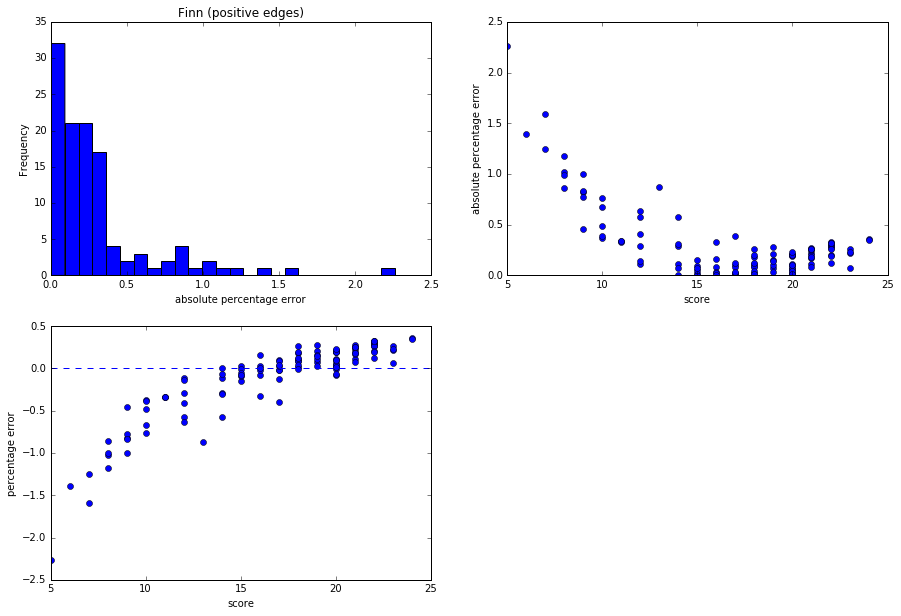

In [136]:
y_true = np.ravel(finn['finn_score'])
y_pred = np.ravel(finn['finn_preds_pos'])
ape = absolute_percentage_error(y_true,y_pred)
pe = percentage_error(y_true,y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plot_hist(ape,25,'Finn (positive edges)','absolute percentage error')
plt.subplot(222)
plot_scatter(y_true,ape,'score','absolute percentage error')
plt.subplot(223)
plot_scatter(y_true,pe,'score','percentage error')
plt.show()

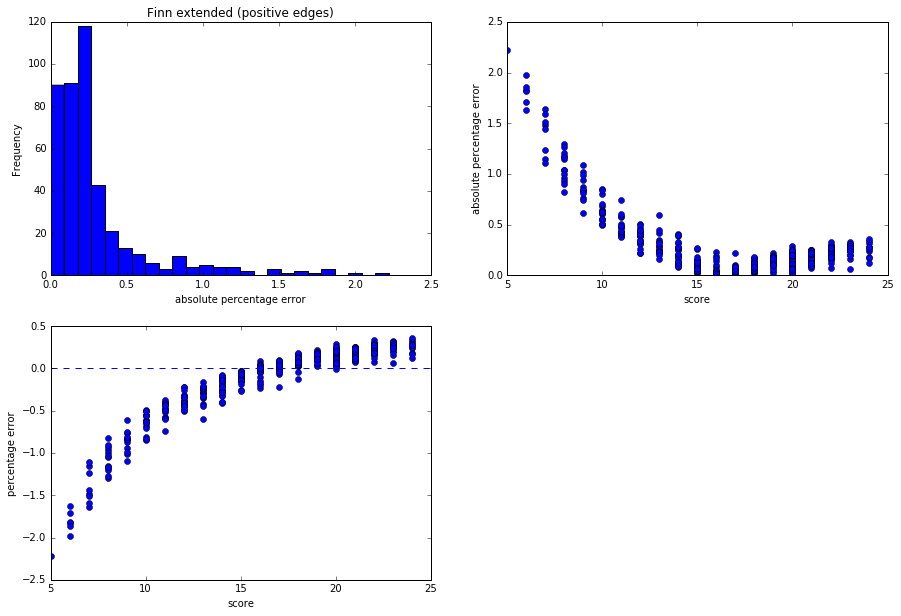

In [137]:
y_true = np.ravel(finn_ext['finn_ext_score'])
y_pred = np.ravel(finn_ext['finn_ext_preds_pos'])
ape = absolute_percentage_error(y_true,y_pred)
pe = percentage_error(y_true,y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plot_hist(ape,25,'Finn extended (positive edges)','absolute percentage error')
plt.subplot(222)
plot_scatter(y_true,ape,'score','absolute percentage error')
plt.subplot(223)
plot_scatter(y_true,pe,'score','percentage error')
plt.show()

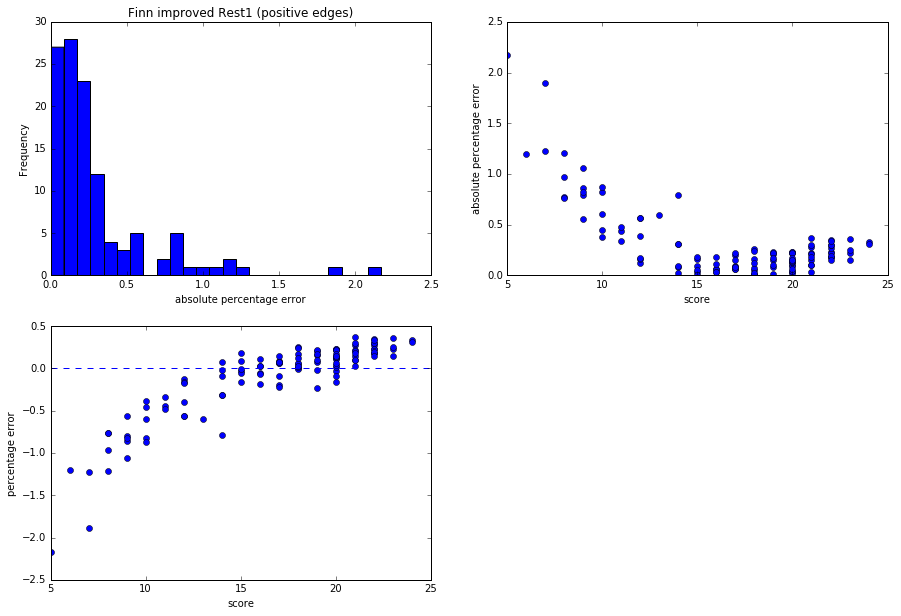

In [138]:
y_true = np.ravel(finn_improved_1['finn_improved_1_score'])
y_pred = np.ravel(finn_improved_1['finn_improved_1_preds_pos'])
ape = absolute_percentage_error(y_true,y_pred)
pe = percentage_error(y_true,y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plot_hist(ape,25,'Finn improved Rest1 (positive edges)','absolute percentage error')
plt.subplot(222)
plot_scatter(y_true,ape,'score','absolute percentage error')
plt.subplot(223)
plot_scatter(y_true,pe,'score','percentage error')
plt.show()

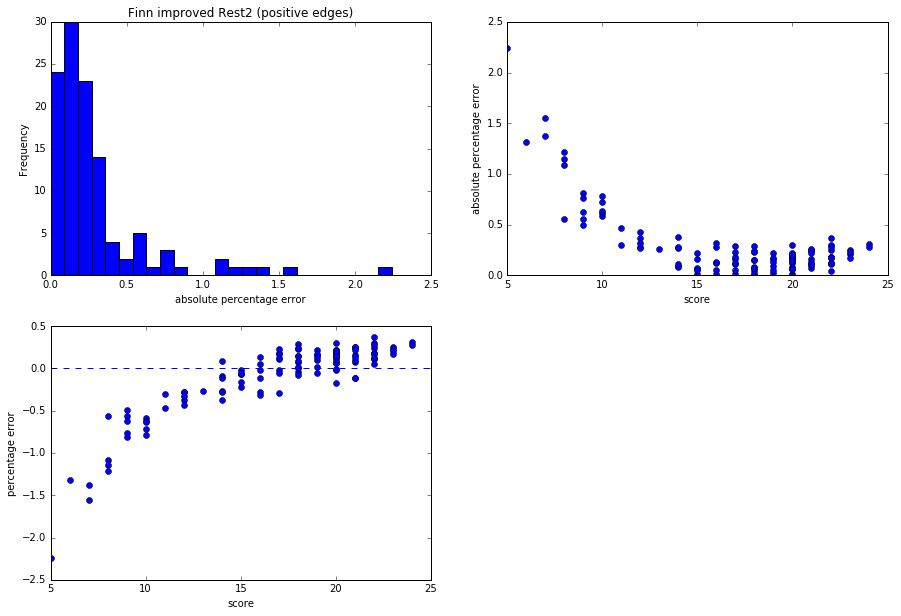

In [139]:
y_true = np.ravel(finn_improved_2['finn_improved_2_score'])
y_pred = np.ravel(finn_improved_2['finn_improved_2_preds_pos'])
ape = absolute_percentage_error(y_true,y_pred)
pe = percentage_error(y_true,y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plot_hist(ape,25,'Finn improved Rest2 (positive edges)','absolute percentage error')
plt.subplot(222)
plot_scatter(y_true,ape,'score','absolute percentage error')
plt.subplot(223)
plot_scatter(y_true,pe,'score','percentage error')
plt.show()

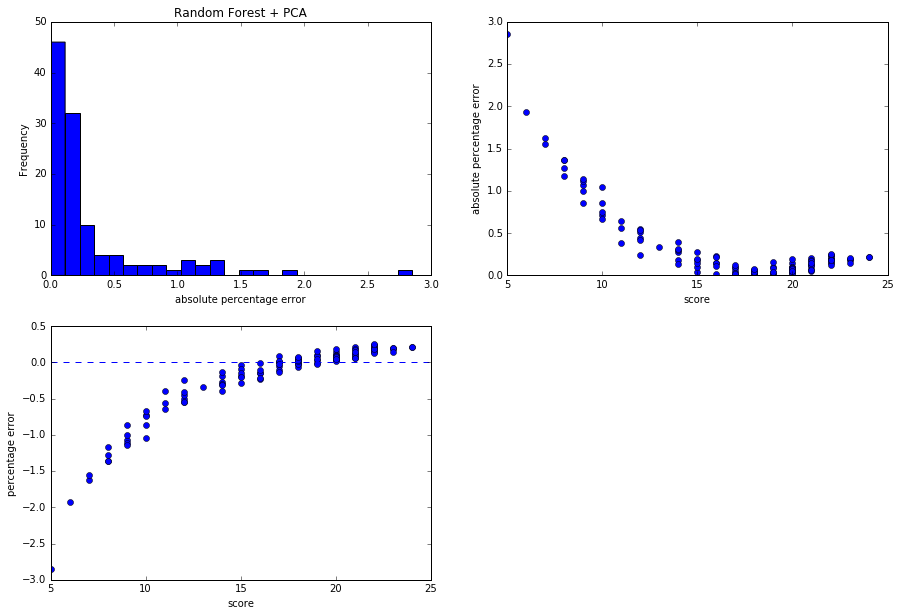

In [140]:
y_true = np.ravel(finn['finn_score'])
y_pred = np.ravel(randforest['rf_preds_pca_train'])
ape = absolute_percentage_error(y_true,y_pred)
pe = percentage_error(y_true,y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plot_hist(ape,25,'Random Forest + PCA','absolute percentage error')
plt.subplot(222)
plot_scatter(y_true,ape,'score','absolute percentage error')
plt.subplot(223)
plot_scatter(y_true,pe,'score','percentage error')
plt.show()

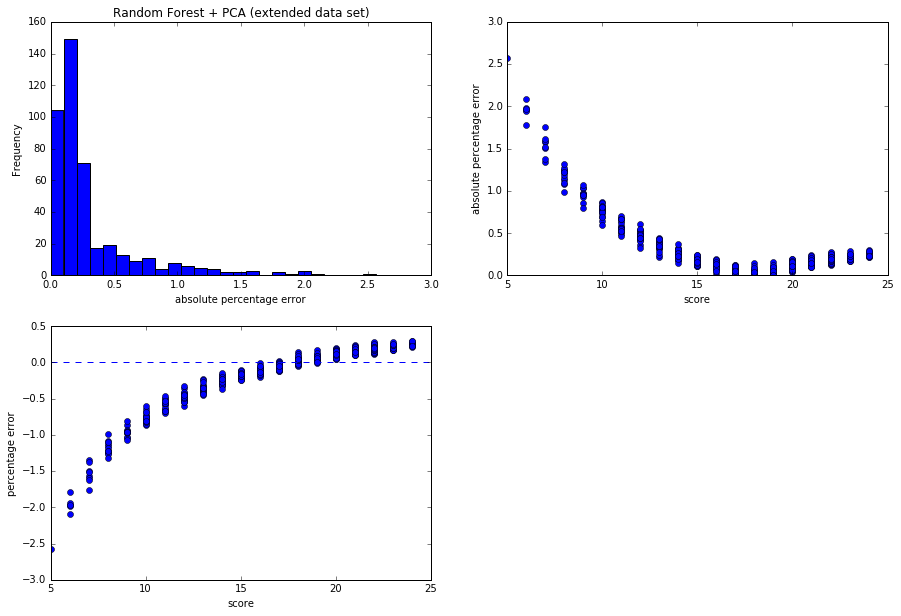

In [141]:
y_true = np.ravel(finn_ext['finn_ext_score'])
y_pred = np.ravel(randforest_ext['rf_ext_preds_pca_train'])
pe = percentage_error(y_true,y_pred)
ape = absolute_percentage_error(y_true,y_pred)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plot_hist(ape,25,'Random Forest + PCA (extended data set)','absolute percentage error')
plt.subplot(222)
plot_scatter(y_true,ape,'score','absolute percentage error')
plt.subplot(223)
plot_scatter(y_true,pe,'score','percentage error')
plt.show()